In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline



URL = r'https://www.data.gouv.fr/en/datasets/r/5c4e1452-3850-4b59-b11c-3dd51d7fb8b5'
#
data = pd.read_csv(URL, parse_dates=['date'])
data.set_index('date', inplace=True)
print(data.head())

incidence_rate = data.groupby([data.index])['tx_incid'].mean()
cas_confirmes=incidence_rate
hospitalises=data.groupby([data.index])['hosp'].sum()

index=pd.date_range('20200318',periods=448,freq='D')
cas_confirmes.to_csv('cas_confirmes.csv')
hospitalises.to_csv('hospitalises.csv')
print(cas_confirmes)

           dep  reg lib_dep                  lib_reg  tx_pos  tx_incid  \
date                                                                     
2020-03-18  01   84     Ain  Auvergne et Rhône-Alpes     NaN       NaN   
2020-03-19  01   84     Ain  Auvergne et Rhône-Alpes     NaN       NaN   
2020-03-20  01   84     Ain  Auvergne et Rhône-Alpes     NaN       NaN   
2020-03-21  01   84     Ain  Auvergne et Rhône-Alpes     NaN       NaN   
2020-03-22  01   84     Ain  Auvergne et Rhône-Alpes     NaN       NaN   

                  TO   R  hosp  rea  ...  dchosp  reg_rea  incid_hosp  \
date                                 ...                                
2020-03-18  0.062612 NaN     2    0  ...       0       35         NaN   
2020-03-19  0.132379 NaN     2    0  ...       0       79         1.0   
2020-03-20  0.155635 NaN     2    0  ...       0       87         0.0   
2020-03-21  0.173524 NaN     4    0  ...       0       88         3.0   
2020-03-22  0.212880 NaN     8    1  ...   

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


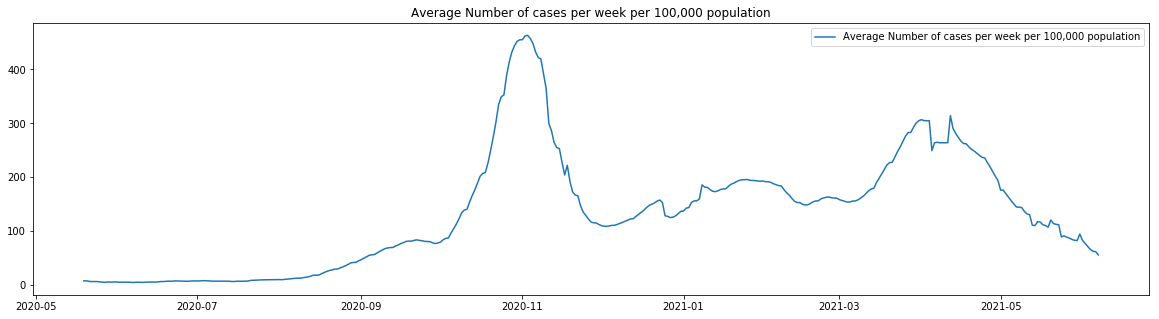

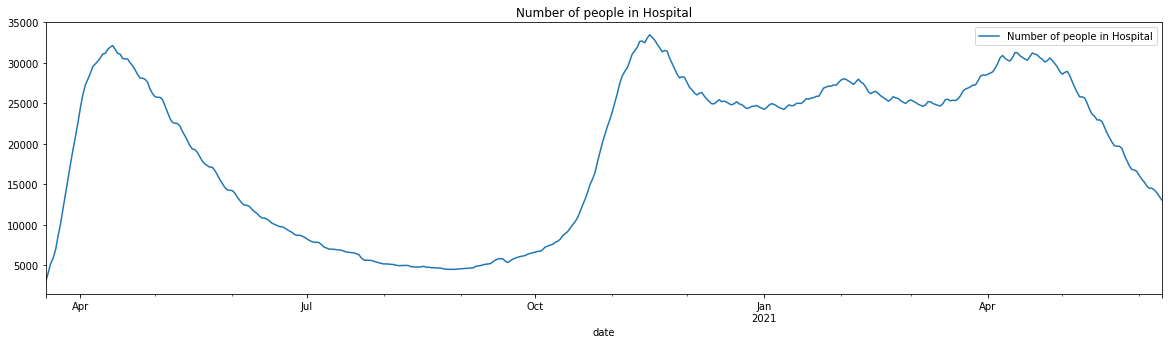

In [4]:
#plotting

%matplotlib inline
plt.figure(figsize=(20, 5))
plt.plot(incidence_rate, label = 'Average Number of cases per week per 100,000 population')
plt.legend(fontsize=10)
plt.title('Average Number of cases per week per 100,000 population')
plt.show()
plt.figure(figsize=(20, 5))
data.groupby([data.index])['hosp'].sum().plot(label = 'Number of people in Hospital')
plt.legend(fontsize=10)
plt.title('Number of people in Hospital')
plt.show()

In [5]:
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import *
plt.rcParams['font.sans-serif'] = ['SimHei'] # Step 1（replace 'sans-serif' font format）
plt.rcParams['axes.unicode_minus'] = False  # 
%matplotlib inline

cas_confirmes=pd.read_csv('cas_confirmes.csv',index_col=0)
hospitalises=pd.read_csv('hospitalises.csv',index_col=0)
pd.to_datetime(cas_confirmes.index,format='%Y-%M-%d')
pd.to_datetime(hospitalises.index,format='%Y-%M-%d')
cas_confirmes.fillna(np.nanmean(cas_confirmes)+30*np.random.random(),inplace=True)
hospitalises.fillna(np.nanmean(hospitalises),inplace=True)


#pd.to_datetime(cas_confirmes.index,format='%Y/%M/%d')
hospitalises.loc['2020-03-19']

hosp    4073
Name: 2020-03-19, dtype: int64

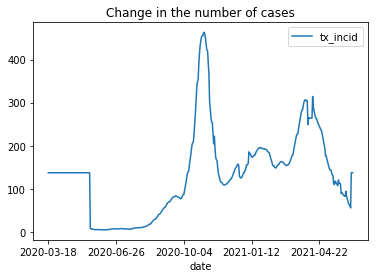

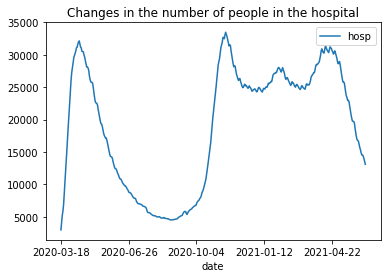

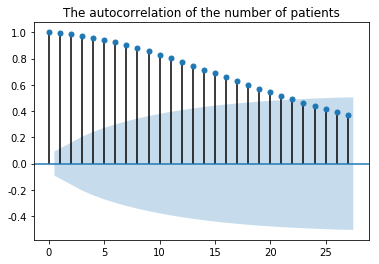

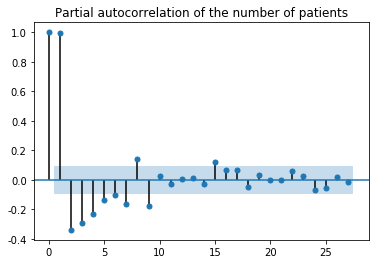

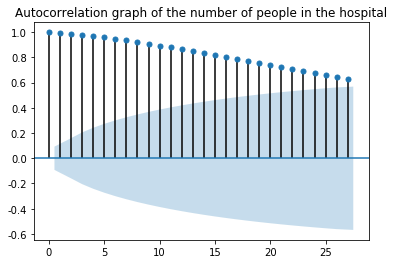

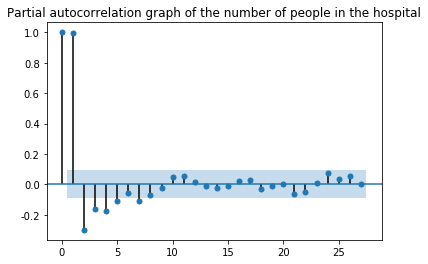

In [6]:
cas_confirmes.plot() 
plt.title('Change in the number of cases')
plt.show()
hospitalises.plot()
plt.title('Changes in the number of people in the hospital')
plt.show()


plot_acf(cas_confirmes)
plt.title('The autocorrelation of the number of patients')
plot_pacf(cas_confirmes)
plt.title('Partial autocorrelation of the number of patients')
plt.show()

plot_acf(hospitalises)
plt.title('Autocorrelation graph of the number of people in the hospital')
plot_pacf(hospitalises)
plt.title('Partial autocorrelation graph of the number of people in the hospital')
plt.show()


In [7]:
# Intercepting stable data
import warnings
warnings.filterwarnings("ignore")


smooth_comfirm = cas_confirmes
smooth_hospital=hospitalises
smooth_comfirm1=smooth_comfirm.diff(1)[1:]
smooth_hospital=smooth_hospital.diff(1)[1:]
print(smooth_comfirm1)
# confirmed cases ADF-test
from statsmodels.tsa.stattools import adfuller as ADF
print(u'The ADF test results of the patients differential sequence were：', ADF(smooth_comfirm1)) #如果p值小于0.05，则平稳，第一个值是统计量，-4.77，第二个值是p值，后面字典里面是对应临界值
result=ADF(smooth_comfirm1)
print('ADF test in patients Statistic: %f' % result[0])
print('Patients with p - value: %f' % result[1])


# people in Hopital ADF-test
print('The ADF test result of the difference sequence of the number of people in the hospital was：', ADF(smooth_hospital)) #如果p值小于0.05，则平稳，第一个值是统计量，-4.77，第二个值是p值，后面字典里面是对应临界值
result=ADF(smooth_hospital)
print('ADF test in hospital Statistic: %f' % result[0])
print('P - value in hospital: %f' % result[1])


#cases white noise test
from statsmodels.stats.diagnostic import acorr_ljungbox
print('The white noise test result of the diseased difference sequence was：', acorr_ljungbox(smooth_comfirm1, lags=1))

#hospital white noise test
print('The white noise test result of hospitalization difference sequence is：', acorr_ljungbox(smooth_hospital, lags=1))
import statsmodels.api as sm  



# cases BIC
train_results = sm.tsa.arma_order_select_ic(cas_confirmes['2020-03-19':'2021-06-09'], ic=['bic'], trend='nc', max_ar=5, max_ma=5)
print('BIC for the number of patients', train_results.bic_min_order)
from statsmodels.tsa.arima_model import ARIMA


pmax = int(len(cas_confirmes)/10) # In general, it won't be larger than length/10
qmax = int(len(cas_confirmes)/10) 
bic_matrix = [] #bic matrix
for p in range(6):
    
    tmp = []
    for q in range(6):
        try: 
            tmp.append(ARIMA(cas_confirmes['2020-03-19':'2021-06-09'], (p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
print(bic_matrix)

bic_matrix = pd.DataFrame(bic_matrix) #find the min value
print(bic_matrix)
 
p,q = bic_matrix.stack().astype('float64').idxmin() 
print(u'The minimum P and Q values of patients with BIC were：%s、%s' %(p,q))


#hospital BIC
train_results = sm.tsa.arma_order_select_ic(hospitalises['2020-03-19':'2021-06-09'], ic=['bic'], trend='nc', max_ar=5, max_ma=5)
print('The hospital BIC', train_results.bic_min_order)
from statsmodels.tsa.arima_model import ARIMA

pmax = int(len(hospitalises)/10)
qmax = int(len(hospitalises)/10) 
bic_matrix = [] #bic matrix
for p in range(6):
    
    tmp = []
    for q in range(6):
        try: 
            tmp.append(ARIMA(hospitalises['2020-3-19':'2021-6-9'], (p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
print(bic_matrix)

bic_matrix = pd.DataFrame(bic_matrix) 
print(bic_matrix)
 
p,q = bic_matrix.stack().astype('float64').idxmin()
print(u'The minimum P and Q values of BIC in hospital were：%s、%s' %(p,q))

             tx_incid
date                 
2020-03-19   0.000000
2020-03-20   0.000000
2020-03-21   0.000000
2020-03-22   0.000000
2020-03-23   0.000000
...               ...
2021-06-06  -0.807875
2021-06-07  -6.079549
2021-06-08  81.673461
2021-06-09   0.000000
2021-06-10   0.000000

[449 rows x 1 columns]
The ADF test results of the patients differential sequence were： (-4.420171173096483, 0.00027336154856584034, 7, 441, {'1%': -3.4452655826028318, '5%': -2.868116205869215, '10%': -2.570272878944473}, 3246.7510170234136)
ADF test in patients Statistic: -4.420171
Patients with p - value: 0.000273
The ADF test result of the difference sequence of the number of people in the hospital was： (-5.888851673658379, 2.957090057237968e-07, 14, 434, {'1%': -3.44550760169756, '5%': -2.868222645936761, '10%': -2.5703296137102085}, 5579.896759005933)
ADF test in hospital Statistic: -5.888852
P - value in hospital: 0.000000
The white noise test result of the diseased difference sequence was： (array

In [8]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
# ARIMA--cases
model = ARIMA(cas_confirmes['2020-03-19':'2021-05-09'], order=(2,0,1))
results_comfirm = model.fit();
resid1 = results_comfirm.resid;
print('The white noise test result of the diseased difference sequence was：', acorr_ljungbox(resid1.values.squeeze(), lags=1))

# ARIMA--hospital
model1 = ARIMA(hospitalises['2020-03-19':'2021-05-09'], order=(4,0,3))
results_hospi = model1.fit()
resid2 = results_hospi.resid
print('The white noise test result of hospitalization difference sequence is：', acorr_ljungbox(resid2.values.squeeze(), lags=1))


import scipy
from statsmodels.tsa.arima_model import ARMA, ARIMA

def draw_ar(ts, w):
    arma = ARMA(ts, order=(w,0)).fit(disp=-1)
    ts_predict = arma.predict()

    plt.clf()
    plt.plot(ts_predict, label="PDT")
    plt.plot(ts, label = "ORG")
    plt.legend(loc="best")
    plt.title("AR Test %s" % w)
    
    plt.savefig("./PDF/test_ar_"+ str(w) +".pdf", format='pdf')

The white noise test result of the diseased difference sequence was： (array([0.79429216]), array([0.37280542]))
The white noise test result of hospitalization difference sequence is： (array([2.20241347]), array([0.13779485]))


<Figure size 864x576 with 0 Axes>

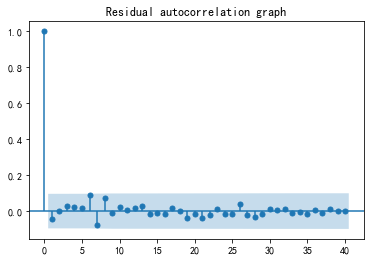

<Figure size 864x576 with 0 Axes>

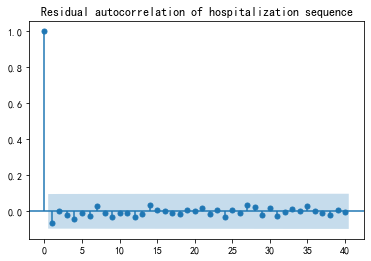

In [81]:
#patient
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.tsa.plot_acf(resid1.values.squeeze(), lags=40)
plt.title('Residual autocorrelation graph')
plt.show()  


#hospital
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.tsa.plot_acf(resid2.values.squeeze(), lags=40)
plt.title('Residual autocorrelation of hospitalization sequence')
plt.show()  

In [90]:
'''
The predict function can only predict the original data, and the forecast function can predict the future data in one or more steps.
The dynamic parameter of predict function is true to predict the unknown data, and false to predict the original data
The ARIMA model is only suitable for short-term prediction. In the long run, you'd better look at the trend prediction of time series. If the prediction time is very long, the traditional time series multiplication model can only be used.
Forecast or do not look at the trend, if it is an exponential model, you fit the linear error is large. Generally, the error is less than 5%. There are many data, the model is suitable, and the error can be within 1%.
'''
%matplotlib inline
# get the predicted and true value -- cases
predict_sunspots_comfirm = results_comfirm.predict(start='2020-03-19',end='2021-05-09')
right_num=smooth_comfirm1.loc['2020-03-19':'2021-05-09']
#
## predicted & actual
predict_array=predict_sunspots_comfirm.values.flatten()
right_num_array=right_num.values.flatten()


## error
error_new=np.sum(np.abs(np.array(predict_array)-np.array(right_num_array)))
print('Error between actual and predicted disease：',error_new)

#cases prediction
predict_comfirm=results_comfirm.forecast(30)
len(predict_comfirm[0])






#Use the last 30 days to calculate the error
print('Error between prediction and actual disease:',np.sum(np.abs(predict_comfirm[0]-smooth_comfirm.loc['2021-05-09':].values)))          #30天的测试集测试

#Predict 30 days after -- cases
model = ARIMA(cas_confirmes['2020-03-20':'2021-06-09'], order=(2,0,1))
results_comfirm = model.fit();
resid = results_comfirm.resid;

print('The white noise test result of the diseased difference sequence was：', acorr_ljungbox(resid.values.squeeze(), lags=1))
predict_comfirm_futrue=results_comfirm.forecast(30)
print(predict_comfirm_futrue[0])

pred=[]
for i in predict_comfirm_futrue[0].flatten():
    i=int(round(i))
    pred.append(i)
print('The predicted number of cases in the future',pred)




Error between actual and predicted disease： 58310.42896274594
Error between prediction and actual disease: 25748.826505526406
The white noise test result of the diseased difference sequence was： (array([0.55502405]), array([0.45627211]))
[169.16278716 175.89813348 182.02796657 187.57337774 192.55608613
 196.99831364 200.92266713 204.35202766 207.30944667 209.81804906
 211.90094294 213.58113595 214.88145802 215.82449025 216.43249995
 216.72738138 216.73060224 216.46315551 215.94551654 215.1976051
 214.23875223 213.08767164 211.76243542 210.28045385 208.65845914
 206.91249277 205.05789635 203.10930562 201.08064755 198.98514026]
The predicted number of cases in the future [169, 176, 182, 188, 193, 197, 201, 204, 207, 210, 212, 214, 215, 216, 216, 217, 217, 216, 216, 215, 214, 213, 212, 210, 209, 207, 205, 203, 201, 199]


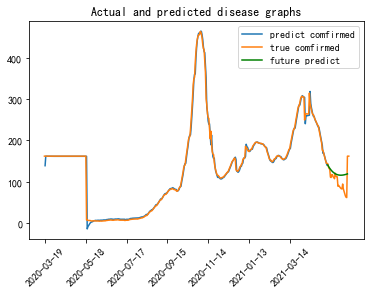

<Figure size 864x576 with 0 Axes>

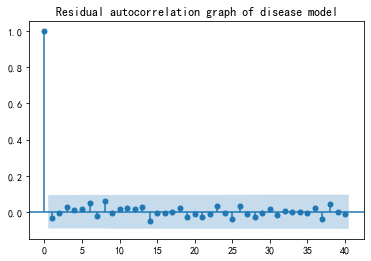

In [92]:
#predict
plt.plot(list(range(1,418)),predict_sunspots_comfirm,label='predict comfirmed')
plt.plot(smooth_comfirm.loc['2020-03-18':'2021-06-09'],label='true comfirmed')
plt.plot(list(range(417,447)),predict_comfirm[0],'g',label='future predict')
plt.title('Actual and predicted disease graphs')
plt.legend()

plt.xticks(range(1,378,60),rotation=45)
plt.show()

#Residual autocorrelation
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
plt.title('Residual autocorrelation graph of disease model')
plt.show()  

In [96]:
## get the predicted and true data--hospital
predict_sunspots_hospit = results_hospi.predict(start='2020-03-19', end='2021-05-09')
right_num=smooth_hospital.loc['2020-03-19':'2021-05-09']
#
print('The number of hospitalizations is forecast：',predict_sunspots_hospit)
## predicted and actual data
predict_array1=predict_sunspots_hospit.values.flatten()
right_num_array1=right_num.values.flatten()

## get the error
error_new=np.sum(np.abs(np.array(predict_array1)-np.array(right_num_array1)))
print('Error between actual and predicted number of hospitalizations：',error_new)

#hospital prediciton
predict_hospi=results_hospi.forecast(30)
print(predict_hospi[0])




print('The error between the predicted 30-day hospitalization and the actual value:',np.sum(np.abs(predict_hospi[0]-hospitalises.iloc[-30:].values)))          #30天的测试集测试

#predict 30 days after -- hospital
# ARIMA--hospital
model1 = ARIMA(hospitalises['2020-03-19':'2021-06-09'], order=(4,0,2))
results_hospi = model1.fit()
resid = results_hospi.resid

print('The white noise test result of hospitalization difference sequence is：', acorr_ljungbox(resid.values.squeeze(), lags=1))
predict_hospital_futrue=results_hospi.forecast(30)
print(predict_hospital_futrue[0])
pred=[]
for i in predict_hospital_futrue[0].flatten():
    i=int(round(i))
    
    pred.append(i)
print('Future hospitalization projections',pred)

The number of hospitalizations is forecast： 2020-03-19    19323.527500
2020-03-20     4089.921352
2020-03-21     6252.817821
2020-03-22     6505.933164
2020-03-23     8105.128030
                  ...     
2021-05-05    27861.444396
2021-05-06    27151.686492
2021-05-07    26459.572452
2021-05-08    25807.175802
2021-05-09    25320.536756
Freq: D, Length: 417, dtype: float64
Error between actual and predicted number of hospitalizations： 8049515.803450303
[25625.66205528 25155.82057193 24627.01654731 24119.68818151
 23654.84354841 23232.9047327  22848.38407197 22495.09326377
 22167.74035468 21862.218315   21575.47150934 21305.2665697
 21049.97727558 20808.41201575 20579.68433925 20363.11905381
 20158.18539102 19964.45000206 19781.54418962 19609.14124388
 19446.94090132 19294.65880226 19152.01944507 19018.75157839
 18894.58528787 18779.25025519 18672.47482362 18573.98561355
 18483.50750876 18400.76388782]
The error between the predicted 30-day hospitalization and the actual value: 341831

417


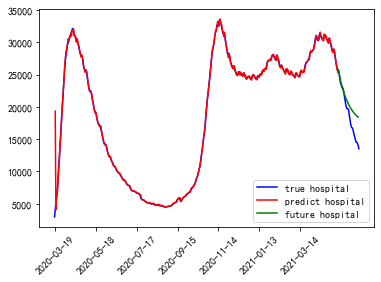

             hosp
date             
2020-03-18   2972
2020-03-19   4073
2020-03-20   5226
2020-03-21   5900
2020-03-22   6954
...           ...
2021-06-05  14532
2021-06-06  14525
2021-06-07  14323
2021-06-08  13984
2021-06-09  13526

[449 rows x 1 columns]


<Figure size 864x576 with 0 Axes>

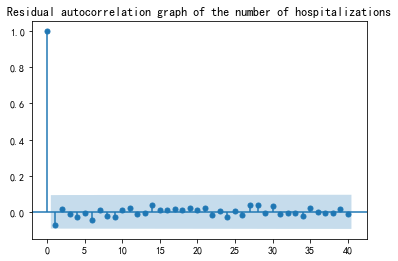

In [97]:
#predict
print(len(predict_sunspots_comfirm))
plt.plot(hospitalises.loc['2020-03-18':'2021-06-09'],'b',label='true hospital')
plt.plot(list(range(1,418)),predict_sunspots_hospit,'r',label='predict hospital')

plt.plot(list(range(418,448)),predict_hospi[0],'g',label='future hospital')
plt.legend()
plt.xticks(range(1,378,60),rotation=45)
plt.show()

print(hospitalises)
#Residual autocorrelation
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
plt.title('Residual autocorrelation graph of the number of hospitalizations')
plt.show()  

In [98]:
#LSTM
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import tensorflow.compat.v1 as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from keras.layers import Dense, Dropout
%matplotlib inline
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
import pandas as pd
# load the data
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

cas_confirmes=pd.read_csv('cas_confirmes.csv',index_col=0)
hospitalises=pd.read_csv('hospitalises.csv',index_col=0)
pd.to_datetime(cas_confirmes.index,format='%Y-%M-%d')
pd.to_datetime(hospitalises.index,format='%Y-%M-%d')
cas_confirmes.fillna(np.nanmean(cas_confirmes)+30*np.random.random(),inplace=True)
hospitalises.fillna(np.nanmean(hospitalises),inplace=True)


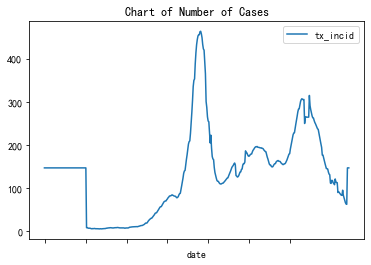

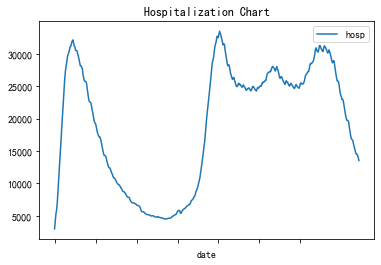

In [99]:
#plotting
cas_confirmes.plot() 
plt.title('Chart of Number of Cases')
plt.xticks(range(1,378,60),rotation=45)
plt.show()
hospitalises.plot()
plt.title('Hospitalization Chart')
plt.xticks(range(1,378,60),rotation=45)
plt.show()

In [100]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array
import pandas as pd 
import tensorflow.compat.v1 as tf
from tensorflow import keras



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 
#pd.to_datetime(data1.index,format='%Y%m%d')



# transform the data to that of supervised learning
def series_to_supervised(data, n_in=3, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# 数据差分法
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# Data Feature engineering
def prepare_data(series, n_test, n_lag, n_seq):       
    # extract the data from the raw data
    raw_values = series.values
    # difference
    diff_series = difference(raw_values, 1)
    # get values
    diff_values = diff_series.values
    print(diff_values)
    # reconstruction
    diff_values = diff_values.reshape(len(diff_values), 1)
    print(diff_values)
    # define to (-1,1)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    print(scaler)
    # min
    scaled_values = scaler.fit_transform(diff_values)
    print(scaled_values)
    # n rows one column
    scaled_values = scaled_values.reshape(len(scaled_values), 1)
    print(scaled_values)
    
    
    
    # to supervised
    supervised = series_to_supervised(scaled_values, n_lag, n_seq)
    print(supervised)
    supervised_values = supervised.values
    # n_test: test data
    train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
    return scaler, train, test

# fit a lstm network
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
    # 每个4位序列中，第1位作为x，后3位作为预测值y
    X, y = train[:, 0:n_lag], train[:, n_lag:]
    # 重构训练数据结构->[samples, timesteps, features]->[22,1,1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    print(X)
    print(y)
    
    model = Sequential()
    
    model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(y.shape[1]))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    # start to train
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
        model.reset_states()
    return model

# LSTM one step forecast
def forecast_lstm(model, X, n_batch):
    # reshape (1,1,1) [samples, timesteps, features]
    X = X.reshape(1, 1, len(X))
   # print('xxx',X.shape)
    # predict tensor shape as (1,3)
    forecast = model.predict(X, batch_size=n_batch)
    # result[[XX,XX,XX]] convert to list
    return [x for x in forecast[0, :]]


# prediction using model
def make_forecasts(model, n_batch, test, n_lag, n_seq):
    forecasts = list()
    # loop for each X value
    for i in range(len(test)):
        # X, y = test[i, 0:n_lag], test[i, n_lag:]
        X = test[i, 0:n_lag]
        print('x',X)
        
        forecast = forecast_lstm(model, X, n_batch)
        # save the predicted data
        forecasts.append(forecast)
    return forecasts   


# inverse_difference
def inverse_difference(last_ob, forecast):
    # invert first forecast
    inverted = list()
    inverted.append(forecast[0] + last_ob)
    # propagate difference forecast using inverted first value
    for i in range(1, len(forecast)):
        inverted.append(forecast[i] + inverted[i-1])
    return inverted

# inversee transform
def inverse_transform(series, forecasts, scaler, n_test):
    inverted = list()
    for i in range(len(forecasts)):
        # create array from forecast
        forecast = array(forecasts[i])
        forecast = forecast.reshape(1, len(forecast))
        
        inv_scale = scaler.inverse_transform(forecast)
        inv_scale = inv_scale[0, :]
        
        index = len(series) - n_test + i - 1
        last_ob = series.values[index]
        inv_diff = inverse_difference(last_ob, inv_scale)
        # save
        inverted.append(inv_diff)
    return inverted

# evaluate the MAE
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
    for i in range(n_seq):
        actual = [row[i] for row in test]
        predicted = [forecast[i] for forecast in forecasts]
        rmse = sqrt(mean_squared_error(actual, predicted))
        print('t+%d MAE: %f' % ((i+1), rmse))

#def plot_forecasts(series, forecasts, n_test):
#    # plot the entire dataset in blue
#    pyplot.plot(cas_confirmes)
#    # plot the forecasts in red
#    for i in range(len(forecasts)):
#        off_s = len(series) - n_test + i - 1
#        off_e = off_s + len(forecasts[i]) + 1
#        xaxis = [x for x in range(off_s, off_e)]
#        yaxis = [series.values[off_s]] + forecasts[i]
#        pyplot.plot(xaxis, yaxis,'ro' ,color='red',markersize=0.8)
#    # show the plot
#    plt.legend(['actual','predict'])
#    plt.title('Prediction of the number of patients with LSTM')
#    plt.xticks(range(1,501,60),rotation=45)
#    pyplot.show()

# load the data
#series = read_csv('s.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# configuration
n_lag = 2   
n_seq = 1    
n_test = 120     
n_epochs = 150 # train 1500 times
n_batch = 1   
n_neurons = 16 

scaler, train, test = prepare_data(cas_confirmes, n_test, n_lag, n_seq)

model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)  #get fitted model

forecasts = make_forecasts(model, n_batch, test, n_lag, n_seq)

forecasts = inverse_transform(cas_confirmes, forecasts, scaler, n_test+2)
print(len(forecasts))

actual = [row[n_lag:] for row in test]

actual = inverse_transform(cas_confirmes, actual, scaler, n_test+2)

evaluate_forecasts(actual, forecasts, n_lag, n_seq)


#plot_forecasts(cas_confirmes, forecasts, n_test+2)

[array([0.]) array([0.]) array([0.]) array([0.]) array([0.]) array([0.])
 array([0.]) array([0.]) array([0.]) array([0.]) array([0.]) array([0.])
 array([0.]) array([0.]) array([0.]) array([0.]) array([0.]) array([0.])
 array([0.]) array([0.]) array([0.]) array([0.]) array([0.]) array([0.])
 array([0.]) array([0.]) array([0.]) array([0.]) array([0.]) array([0.])
 array([0.]) array([0.]) array([0.]) array([0.]) array([0.]) array([0.])
 array([0.]) array([0.]) array([0.]) array([0.]) array([0.]) array([0.])
 array([0.]) array([0.]) array([0.]) array([0.]) array([0.]) array([0.])
 array([0.]) array([0.]) array([0.]) array([0.]) array([0.]) array([0.])
 array([0.]) array([0.]) array([0.]) array([0.]) array([0.]) array([0.])
 array([0.]) array([-138.8128405]) array([0.26425293])
 array([-1.03084809]) array([-0.47239213]) array([0.05968772])
 array([0.09838807]) array([-0.64763604]) array([-0.35051505])
 array([-0.50230803]) array([0.6021527]) array([-0.19297377])
 array([0.27371723]) array(

x [0.18242179 0.19104087]
x [0.19104087 0.20140285]
x [0.20140285 0.18905854]
x [0.18905854 0.19486847]
x [0.19486847 0.22199807]
x [0.22199807 0.24144071]
x [0.24144071 0.21453207]
x [0.21453207 0.23154113]
x [0.23154113 0.24529944]
x [0.24529944 0.26399889]
x [0.26399889 0.27025934]
x [0.27025934 0.25694026]
x [0.25694026 0.24461823]
x [0.24461823 0.27700638]
x [0.27700638 0.25791058]
x [0.25791058 0.25326908]
x [0.25326908 0.24751057]
x [0.24751057 0.22888867]
x [0.22888867 0.23879352]
x [0.23879352 0.24086314]
x [0.24086314 0.21766305]
x [0.21766305 0.2282314 ]
x [0.2282314  0.22940559]
x [0.22940559 0.23090228]
x [0.23090228 0.2448424 ]
x [0.2448424  0.25676936]
x [0.25676936 0.24369609]
x [0.24369609 0.26094902]
x [0.26094902 0.27178226]
x [0.27178226 0.2750216 ]
x [0.2750216 0.2837302]
x [0.2837302  0.28919012]
x [0.28919012 0.27623635]
x [0.27623635 0.25093861]
x [0.25093861 0.33837207]
x [0.33837207 0.31403071]
x [0.31403071 0.31653989]
x [0.31653989 0.31692667]
x [0.31692667 

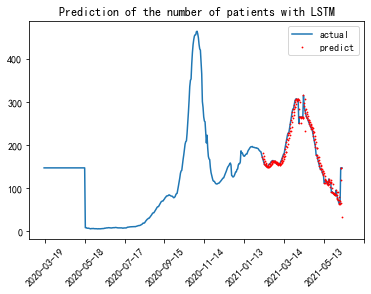

In [101]:
#plot 
pyplot.plot(cas_confirmes)
for i in range(len(forecasts)):
    off_s = len(cas_confirmes) - n_test + i - 1
    off_e = off_s + len(forecasts[i]) + 1
    xaxis = [x for x in range(off_s, off_e)]
    yaxis = [cas_confirmes.values[off_s]] + forecasts[i]
    pyplot.plot(xaxis, yaxis,'ro' ,color='red',markersize=0.8)
# show the plot
plt.legend(['actual','predict'])
plt.title('Prediction of the number of patients with LSTM')
plt.xticks(range(1,501,60),rotation=45)
pyplot.show()

In [102]:
from keras import backend as K #convert to tensor

y_true=cas_confirmes.iloc[-30:].values
y_predict=forecasts[-30:]
print(y_predict)
print('LSTM model of the number of patients with 30 days of MAE：',np.sum(np.abs(y_true-np.array(y_predict).flatten())))
x_input=cas_confirmes.iloc[-2:].values
scaler = MinMaxScaler(feature_range=(-1, 1))
print(scaler)
    
x_input = scaler.fit_transform(x_input)
#x_input=scaler.transform(x_input.flatten())
print(x_input)
predict=[]

import gc



for i in range(30):
    
        
        x_input1 = x_input.reshape((1, 1, len(x_input)))
       
        x_input1=X_train1 = K.cast_to_floatx(x_input1)
        
        yhat = model.predict(x_input1,batch_size=n_batch)
        predict.append(yhat[0][0])
    
        x_input=np.array(x_input).flatten().tolist()
        del x_input[0]
        x_input.append(yhat[0][0])
        x_input=np.array(x_input)
gc.collect()
predict=scaler.inverse_transform(np.array(predict).reshape(-1,1)).flatten().tolist()
print(predict)

predict1=predict

predict2=[]
for  i in predict:
    if i <=0:
        i==0
    predict2.append(round(i))
print('The LSTM model predicts the number of patients in the future',predict2)  

[[array([139.2895288])], [array([139.84160204])], [array([134.53097679])], [array([120.53387308])], [array([127.06945508])], [array([114.85867171])], [array([108.46794399])], [array([113.54041274])], [array([114.80950515])], [array([108.91517467])], [array([117.50421123])], [array([101.03810915])], [array([118.33976436])], [array([112.67915529])], [array([99.42353704])], [array([109.20114355])], [array([87.17673829])], [array([88.94362978])], [array([86.4565456])], [array([85.00491789])], [array([83.4502478])], [array([89.44233741])], [array([73.32131926])], [array([89.71500241])], [array([78.299607])], [array([72.56239117])], [array([68.31936418])], [array([64.29365034])], [array([118.53658284])], [array([33.37268028])]]
LSTM model of the number of patients with 30 days of MAE： 24467.68941162966
MinMaxScaler(feature_range=(-1, 1))
[[-1.]
 [-1.]]
[146.9214630126953, 146.83404541015625, 146.85186767578125, 146.84454345703125, 146.8366241455078, 146.8290557861328, 146.8238525390625, 146.

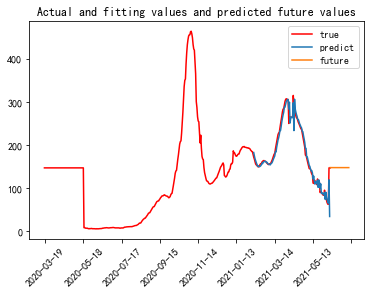

In [103]:
#  future data ploting
plt.plot(cas_confirmes,'r',label='true')
plt.plot(list(range(328,448)),np.array(forecasts).flatten(),label='predict')
plt.plot(list(range(448,478)),predict1,label='future')
plt.xticks(range(1,501,60),rotation=45)
plt.title('Actual and fitting values and predicted future values')
plt.legend()
plt.show()

In [104]:
#hospital
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array
import pandas as pd 
import tensorflow.compat.v1 as tf
from tensorflow import keras



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  # 
#pd.to_datetime(data1.index,format='%Y%m%d')




def series_to_supervised(data, n_in=3, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)


def prepare_data(series, n_test, n_lag, n_seq):       
    
    raw_values = series.values
    
    diff_series = difference(raw_values, 1)
    
    diff_values = diff_series.values
    print(diff_values)
    
    diff_values = diff_values.reshape(len(diff_values), 1)
    print(diff_values)
    
    scaler = MinMaxScaler(feature_range=(-1, 1))
    print(scaler)
    
    scaled_values = scaler.fit_transform(diff_values)
    print(scaled_values)
    
    scaled_values = scaled_values.reshape(len(scaled_values), 1)
    print(scaled_values)
    
   
    supervised = series_to_supervised(scaled_values, n_lag, n_seq)
    print(supervised)
    supervised_values = supervised.values
    
    train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
    return scaler, train, test

# fit a model
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
    # 每个4位序列中，第1位作为x，后3位作为预测值y
    X, y = train[:, 0:n_lag], train[:, n_lag:]
    # train dataset ->[samples, timesteps, features]->[22,1,1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    print(X)
    print(y)
    # Network Construction
    model = Sequential()
    # one neural unit， batch_input_shape(1,1,1)，传递序列状态
    model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(y.shape[1]))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    # start to train
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
        model.reset_states()
    return model

def forecast_lstm(model, X, n_batch):
    X = X.reshape(1, 1, len(X))
    forecast = model.predict(X, batch_size=n_batch)
    return [x for x in forecast[0, :]]


def make_forecasts(model, n_batch, test, n_lag, n_seq):
    forecasts = list()
    for i in range(len(test)):
        # X, y = test[i, 0:n_lag], test[i, n_lag:]
        X = test[i, 0:n_lag]
        #print('x',X)
        forecast = forecast_lstm(model, X, n_batch)
        forecasts.append(forecast)
    return forecasts

def inverse_difference(last_ob, forecast):
    # invert first forecast
    inverted = list()
    inverted.append(forecast[0] + last_ob)
    # propagate difference forecast using inverted first value
    for i in range(1, len(forecast)):
        inverted.append(forecast[i] + inverted[i-1])
    return inverted

def inverse_transform(series, forecasts, scaler, n_test):
    inverted = list()
    for i in range(len(forecasts)):
        # create array from forecast
        forecast = array(forecasts[i])
        forecast = forecast.reshape(1, len(forecast))
        inv_scale = scaler.inverse_transform(forecast)
        inv_scale = inv_scale[0, :]
        index = len(series) - n_test + i - 1
        last_ob = series.values[index]
        inv_diff = inverse_difference(last_ob, inv_scale)
        inverted.append(inv_diff)
    return inverted

def evaluate_forecasts(test, forecasts, n_lag, n_seq):
    for i in range(n_seq):
        actual = [row[i] for row in test]
        predicted = [forecast[i] for forecast in forecasts]
        rmse = sqrt(mean_squared_error(actual, predicted))
        print('t+%d MAE: %f' % ((i+1), rmse))


# configuration
n_lag = 2   
n_seq = 1     
n_test = 120    
n_epochs = 150 
n_batch = 1   
n_neurons = 16 

scaler, train, test = prepare_data(hospitalises, n_test, n_lag, n_seq)

model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)  
forecasts = make_forecasts(model, n_batch, test, n_lag, n_seq)

forecasts = inverse_transform(hospitalises, forecasts, scaler, n_test+2)
print(len(forecasts))
actual = [row[n_lag:] for row in test]

actual = inverse_transform(hospitalises, actual, scaler, n_test+2)

evaluate_forecasts(actual, forecasts, n_lag, n_seq)


[array([1101], dtype=int64) array([1153], dtype=int64)
 array([674], dtype=int64) array([1054], dtype=int64)
 array([1719], dtype=int64) array([1490], dtype=int64)
 array([1909], dtype=int64) array([1807], dtype=int64)
 array([1822], dtype=int64) array([1879], dtype=int64)
 array([1731], dtype=int64) array([1635], dtype=int64)
 array([1726], dtype=int64) array([1871], dtype=int64)
 array([1588], dtype=int64) array([1171], dtype=int64)
 array([701], dtype=int64) array([744], dtype=int64)
 array([822], dtype=int64) array([302], dtype=int64)
 array([346], dtype=int64) array([391], dtype=int64)
 array([500], dtype=int64) array([51], dtype=int64)
 array([506], dtype=int64) array([287], dtype=int64)
 array([179], dtype=int64) array([-508], dtype=int64)
 array([-451], dtype=int64) array([-111], dtype=int64)
 array([-546], dtype=int64) array([-29], dtype=int64)
 array([-24], dtype=int64) array([-478], dtype=int64)
 array([-357], dtype=int64) array([-514], dtype=int64)
 array([-559], dtype=int6

120
t+1 MAE: 215.149426


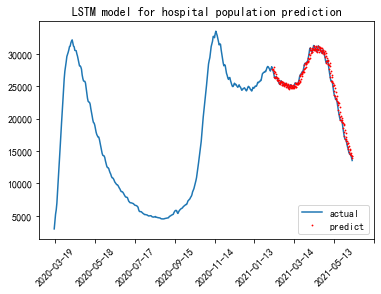

In [105]:
pyplot.plot(hospitalises)
# plot the forecasts in red
for i in range(len(forecasts)):
    off_s = len(hospitalises) - n_test + i - 1
    off_e = off_s + len(forecasts[i]) + 1
    xaxis = [x for x in range(off_s, off_e)]
    yaxis = [hospitalises.values[off_s]] + forecasts[i]
    pyplot.plot(xaxis, yaxis,'ro' ,color='red',markersize=0.8)
# show the plot
plt.legend(['actual','predict'])
plt.title('LSTM model for hospital population prediction')
plt.xticks(range(1,501,60),rotation=45)
pyplot.show()

In [106]:
#hospital 30days-prediction

%matplotlib inline
from keras import backend as K 

y_true=hospitalises.iloc[-30:].values
y_predict=forecasts[-30:]
print(y_predict)
print('The LSTM model inpatient number of MAE at 30 days：',np.sum(np.abs(y_true-np.array(y_predict).flatten())))
x_input=hospitalises.iloc[-2:].values
scaler = MinMaxScaler(feature_range=(-1, 1))
print(scaler)
x_input = scaler.fit_transform(x_input)
#x_input=scaler.transform(x_input.flatten())
print(x_input)
predict=[]
for i in range(30):
    
        
        x_input1 = x_input.reshape((1, 1, len(x_input)))
       
        x_input1=X_train1 = K.cast_to_floatx(x_input1)
        
        yhat = model.predict(x_input1,batch_size=n_batch)
        predict.append(yhat[0][0])
    
        x_input=np.array(x_input).flatten().tolist()
        del x_input[0]
        x_input.append(yhat[0][0])
        x_input=np.array(x_input)
predict=scaler.inverse_transform(np.array(predict).reshape(-1,1)).flatten().tolist()
print(predict)

predict2=[]   


for  i in predict:
    if i <=0:
        i==0
    predict2.append(round(i))
print('LSTM model to predict the future number of patients in hospitals',predict2)  

[[array([25428.66387939])], [array([25232.15148926])], [array([25208.11679077])], [array([24715.79003906])], [array([24112.49429321])], [array([23199.5397644])], [array([23403.89540267])], [array([22472.38275146])], [array([22383.59521484])], [array([22326.43969727])], [array([21706.30688477])], [array([21007.41021729])], [array([20464.22406006])], [array([20141.28094482])], [array([19453.81640625])], [array([19282.97946167])], [array([19046.99859619])], [array([19099.40261841])], [array([18154.24475098])], [array([17725.26708984])], [array([17153.60973358])], [array([16461.51278687])], [array([16273.87689209])], [array([16270.80166626])], [array([15792.08789062])], [array([15242.20202637])], [array([15100.31108093])], [array([14669.03617859])], [array([14154.87802124])], [array([14178.59701538])]]
The LSTM model inpatient number of MAE at 30 days： 3702701.4804291725
MinMaxScaler(feature_range=(-1, 1))
[[ 1.]
 [-1.]]
[13480.5341796875, 13557.8466796875, 13594.5810546875, 13610.14648437

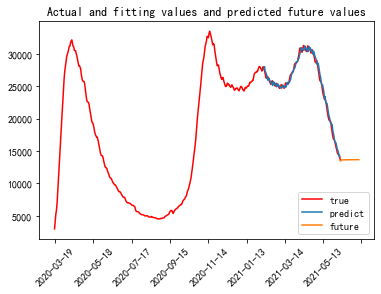

In [107]:
plt.plot(hospitalises,'r',label='true')
plt.plot(list(range(328,448)),np.array(forecasts).flatten(),label='predict')
plt.plot(list(range(448,478)),predict,label='future')
plt.legend()
plt.xticks(range(1,501,60),rotation=45)
plt.title('Actual and fitting values and predicted future values')
plt.show()

In [ ]:
print(train.shape)

In [108]:
#cases total comparison--using historical data
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model

dataframe =cas_confirmes
dataset = dataframe.values
# int --> float
dataset = dataset.astype('float32')
#normalization 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(len(dataset),-1))

train_size = int(len(dataset) * 0.65)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]


#scaler = MinMaxScaler(feature_range=(0, 1))
#dataset = scaler.fit_transform(dataset)

def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#too little data lead that the value of look_back cannot be too large
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.save(os.path.join("DATA","Test" + ".h5"))
# make predictions

#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#inverse normalization back to the beginning format
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)



Epoch 1/100
289/289 - 0s - loss: 0.0680
Epoch 2/100
289/289 - 0s - loss: 0.0427
Epoch 3/100
289/289 - 0s - loss: 0.0328
Epoch 4/100
289/289 - 0s - loss: 0.0230
Epoch 5/100
289/289 - 0s - loss: 0.0142
Epoch 6/100
289/289 - 0s - loss: 0.0071
Epoch 7/100
289/289 - 0s - loss: 0.0030
Epoch 8/100
289/289 - 0s - loss: 0.0012
Epoch 9/100
289/289 - 0s - loss: 7.5155e-04
Epoch 10/100
289/289 - 0s - loss: 6.8821e-04
Epoch 11/100
289/289 - 0s - loss: 6.7577e-04
Epoch 12/100
289/289 - 0s - loss: 6.9132e-04
Epoch 13/100
289/289 - 0s - loss: 6.7675e-04
Epoch 14/100
289/289 - 0s - loss: 7.0510e-04
Epoch 15/100
289/289 - 0s - loss: 6.9278e-04
Epoch 16/100
289/289 - 0s - loss: 6.8183e-04
Epoch 17/100
289/289 - 0s - loss: 6.9215e-04
Epoch 18/100
289/289 - 0s - loss: 7.0424e-04
Epoch 19/100
289/289 - 0s - loss: 7.1493e-04
Epoch 20/100
289/289 - 0s - loss: 6.7598e-04
Epoch 21/100
289/289 - 0s - loss: 6.8239e-04
Epoch 22/100
289/289 - 0s - loss: 6.9649e-04
Epoch 23/100
289/289 - 0s - loss: 6.9037e-04
Epoch 

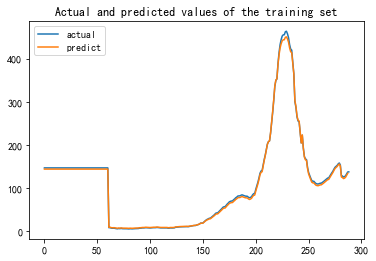

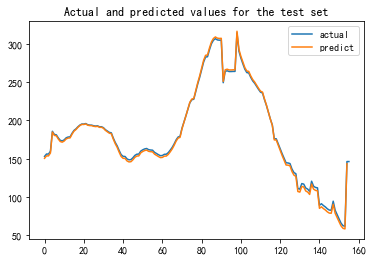

In [109]:
#plotting
plt.plot(trainY,label='actual')
plt.plot(trainPredict[1:],label='predict')
plt.title('Actual and predicted values of the training set')
plt.legend()

plt.show()
plt.plot(testY,label='actual')
plt.plot(testPredict[1:],label='predict')
plt.legend()
plt.title('Actual and predicted values for the test set')
plt.show()

In [110]:
# hospital total comparison
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model

dataframe =hospitalises
dataset = dataframe.values
# int --> float
dataset = dataset.astype('float32')
#normalization
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(len(dataset),-1))

train_size = int(len(dataset) * 0.65)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]


#scaler = MinMaxScaler(feature_range=(0, 1))
#dataset = scaler.fit_transform(dataset)

def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)

look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.save(os.path.join("DATA","Test" + ".h5"))
# make predictions

#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#inverse normalization
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)



Epoch 1/100
289/289 - 0s - loss: 0.1285
Epoch 2/100
289/289 - 0s - loss: 0.0456
Epoch 3/100
289/289 - 0s - loss: 0.0240
Epoch 4/100
289/289 - 0s - loss: 0.0085
Epoch 5/100
289/289 - 0s - loss: 0.0013
Epoch 6/100
289/289 - 0s - loss: 4.3508e-04
Epoch 7/100
289/289 - 0s - loss: 4.0393e-04
Epoch 8/100
289/289 - 0s - loss: 4.0450e-04
Epoch 9/100
289/289 - 0s - loss: 3.8976e-04
Epoch 10/100
289/289 - 0s - loss: 4.0459e-04
Epoch 11/100
289/289 - 0s - loss: 3.8772e-04
Epoch 12/100
289/289 - 0s - loss: 3.8015e-04
Epoch 13/100
289/289 - 0s - loss: 3.8547e-04
Epoch 14/100
289/289 - 0s - loss: 3.6617e-04
Epoch 15/100
289/289 - 0s - loss: 3.6611e-04
Epoch 16/100
289/289 - 0s - loss: 3.5452e-04
Epoch 17/100
289/289 - 0s - loss: 3.6116e-04
Epoch 18/100
289/289 - 0s - loss: 3.6619e-04
Epoch 19/100
289/289 - 0s - loss: 3.5933e-04
Epoch 20/100
289/289 - 0s - loss: 3.5066e-04
Epoch 21/100
289/289 - 0s - loss: 3.4581e-04
Epoch 22/100
289/289 - 0s - loss: 3.6217e-04
Epoch 23/100
289/289 - 0s - loss: 3.478

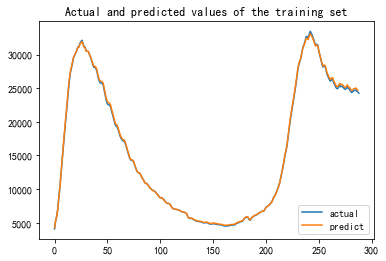

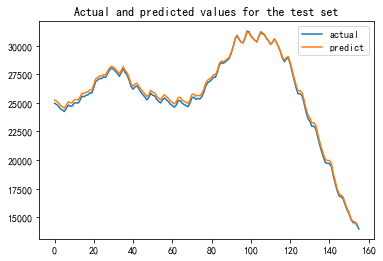

In [111]:
plt.plot(trainY,label='actual')
plt.plot(trainPredict[1:],label='predict')
plt.title('Actual and predicted values of the training set')
plt.legend()
plt.show()
plt.plot(testY,label='actual')
plt.plot(testPredict[1:],label='predict')
plt.legend()
plt.title('Actual and predicted values for the test set')
plt.show()